In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from scipy.stats.mstats import winsorize


In [3]:
# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Concatenate train and test data for preprocessing
all_data = pd.concat([train_data, test_data], axis=0)

In [4]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
all_data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [7]:
# Imputing missing values in numeric columns with median
nums = all_data.select_dtypes(include=['int64', 'float64']).columns
all_data[nums] = all_data[nums].fillna(all_data[nums].median())


In [8]:
# Imputing missing values in categorical columns with mode

categorical = all_data.select_dtypes(include=['object']).columns
all_data[categorical] = all_data[categorical].fillna(all_data[categorical].mode().iloc[0])

In [9]:
# Winsorize numerical features to handle outliers
num_features = all_data.select_dtypes(include=np.number).columns
all_data[num_features] = all_data[num_features].apply(lambda x: winsorize(x, limits=[0.01, 0.01]))

In [10]:
# Encode categorical variables
all_data = pd.get_dummies(all_data)

In [11]:
all_data.isna().sum().sum()

0

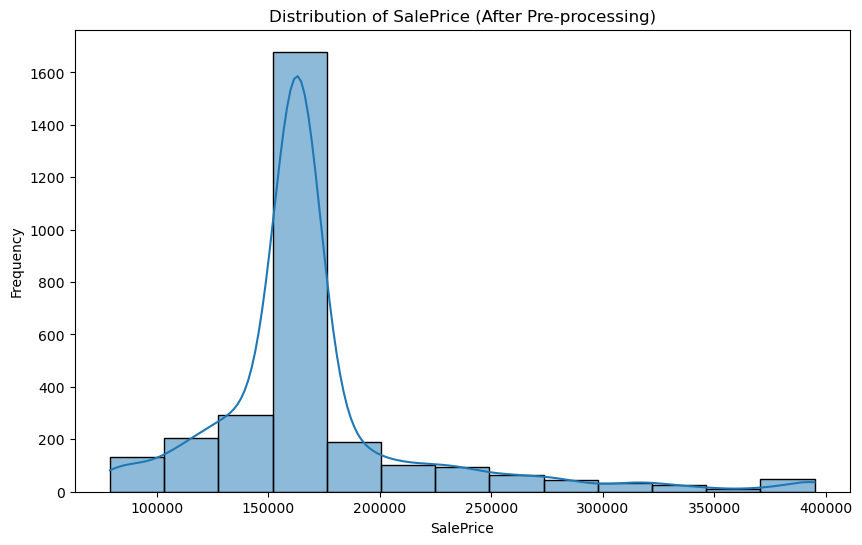

In [15]:
# Visualizing distribution of the target variable (SalePrice) after handling missing values and encoding

plt.figure(figsize=(10, 6))
sns.histplot(all_data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice (After Pre-processing)')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

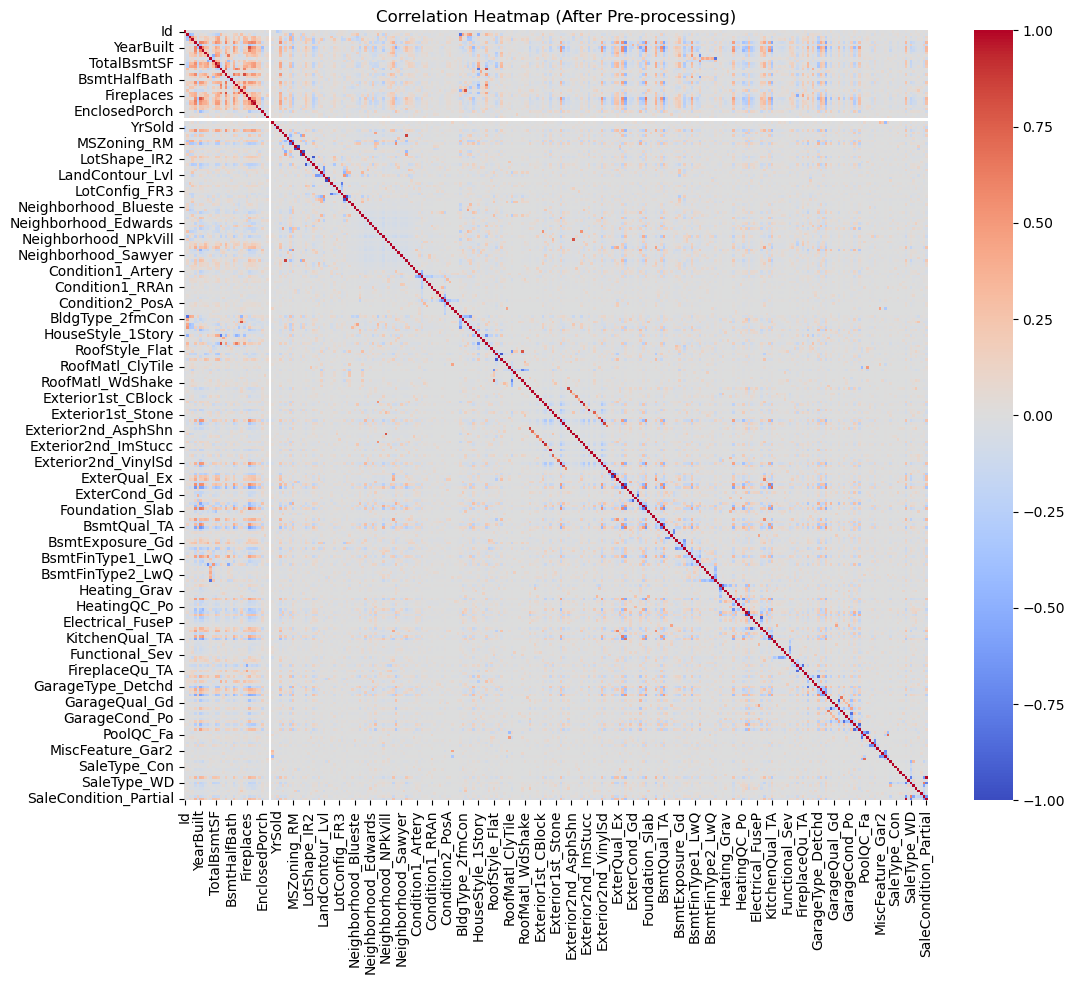

In [16]:
# Visualizing correlation between numeric features after pre-processing

plt.figure(figsize=(12, 10))
sns.heatmap(all_data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (After Pre-processing)')
plt.show()

In [12]:
# Split back into train and test datasets
X = all_data.drop(columns=['SalePrice'])
y = all_data['SalePrice']

In [13]:
# Splitting the data into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# Verifying the shapes of the training and testing sets

print( X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(2335, 288) (2335,)
(584, 288) (584,)


In [17]:
# Initializing polynomial features transformer

poly_transformer = PolynomialFeatures(degree=2)

NameError: name 'PolynomialFeatures' is not defined

In [18]:
# Polynomial regression

from sklearn.preprocessing import PolynomialFeatures

In [19]:
poly_transformer = PolynomialFeatures(degree=2)

In [20]:
# Transforming features to polynomial features

X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

In [22]:
# Linear regression 

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [23]:
# Initializing and training the linear regression model

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predicting on the testing set

y_pred = linear_reg_model.predict(X_test)

In [25]:
# Evaluating the model using mean squared error (MSE)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Linear Regression):", mse)

Mean Squared Error (Linear Regression): 1654220555.3293688


In [26]:
# Evaluaing the model using R squared 

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test, y_pred),3)))

r2 score (coefficient of determination): 0.311


In [29]:
# Regression metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [30]:
# Evaluating the model using Mean absolute error

print('MAE : ' +str(round(mean_absolute_error(y_test, y_pred),3)))

MAE : 29954.309


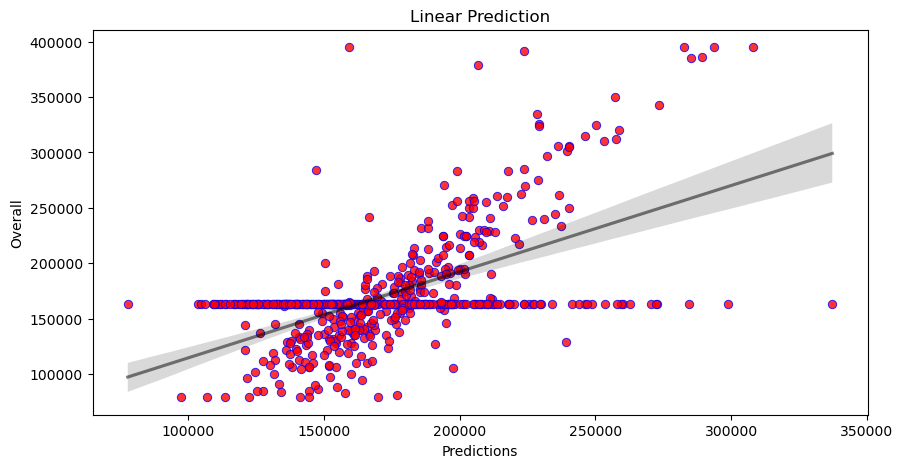

In [31]:
# Visualizing the Linear Prediction

plt.figure(figsize=(10,5))
sns.regplot(x= y_pred, y = y_test, 
            scatter_kws={'color':'red',
                         'edgecolor':'blue',
                         'linewidths':0.7},
            line_kws={'color':'black','alpha':0.5}
           )
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction")
plt.show()

In [32]:
# Initializing and training the polynomial regression model

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

LinearRegression()

In [33]:
# Predicting on the testing set

y_pred_poly = poly_reg_model.predict(X_test_poly)

In [34]:
# Evaluating the model using mean squared error (MSE)

mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression - Degree 2):", mse_poly)

Mean Squared Error (Polynomial Regression - Degree 2): 118672967792.19875


In [35]:
r2_poly = r2_score(y_test, y_pred_poly)

print("R-squared (Polynomial Regression):", r2_poly)

R-squared (Polynomial Regression): -48.44946278108308


In [36]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)
print("MAE (Polynomial Regression):", mae_poly)

MAE (Polynomial Regression): 177571.42805768488


In [37]:
# Regularization - Ridge and Lasso regression (linear regressions)
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

In [38]:
# Instantiating a Ridge model with a regularization parameter alpha=0.1
# Fitting it to the training data X_train and y_train using the fit method
#Predicting using the test data and calculating the performance metrics

ridge_regr = Ridge(alpha=0.1)
ridge_regr.fit(X_train, y_train)
y_pred = ridge_regr.predict(X_test)

In [39]:
# Printing the performance metrics R^2, RMSE and MAE 

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test, y_pred),3)))
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test, y_pred)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test, y_pred),3)))

r2 score (coefficient of determination): 0.316
RMSE : 40528.158
MAE : 29864.935


In [40]:
# Executing tuning of alpha using RidgeCV and assigning to a variable named "ridgeCV_model"
# Fitting ridgeCV_model to my train data 
# Returning the ridgeCV_model.alpha_ 

ridgeCV_model = RidgeCV(alphas=np.logspace(-6, 6, 13), scoring='r2', cv=10)
ridgeCV_model.fit(X_train, y_train)

optimal_alpha = ridgeCV_model.alpha_
print(optimal_alpha)

C:\Users\User\anaconda4\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.86958e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\User\anaconda4\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.97974e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\User\anaconda4\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.78608e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\User\anaconda4\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.95278e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\User\anaconda4\Lib\site-packages\sklearn\linear_model\_ridge.py:211: Li

1000.0


In [41]:
# Implementing the optimal model named "ridge_optmodel" with the new optimal alpha
# Print your final results

ridge_optmodel = Ridge(alpha = optimal_alpha)
ridge_optmodel.fit(X_train, y_train)
y_pred_opt = ridge_optmodel.predict(X_test)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test, y_pred_opt),3)))
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test, y_pred_opt)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test, y_pred_opt),3)))

r2 score (coefficient of determination): 0.362
RMSE : 39125.643
MAE : 28941.493


In [42]:
# Instantiating a Lasso model with a regularization parameter alpha=0.1
# Fitting it to the training data X_train and y_train using the fit method 
# Predicting using the test data and calculating the performance metrics
# The alpha is a hyperparameter to tune and we need to find out the optimal alpha value

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

C:\Users\User\anaconda4\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.447e+12, tolerance: 6.222e+08
  model = cd_fast.enet_coordinate_descent(


In [43]:
# Printing the performance metrics R^2, RMSE and MAE 

print("Training score:", lasso.score(X_train, y_train))
print("Testing score:",  lasso.score(X_test, y_test))
print("MAE of Lasso Regression:", mean_absolute_error(y_test, y_pred), '\n')

Training score: 0.5341985212962683
Testing score: 0.31376297088624194
MAE of Lasso Regression: 29940.679851707293 



In [44]:
# Executing tuning of alpha using LassoCV() and assigning to a variable named "lassoCV_model"
# Fitting lassoCV_model to my train data 
# Returning the lassoCV_model.alpha_ 

lassoCV_model = LassoCV(alphas=np.logspace(-6, 6, 13), cv=10, random_state=0) 
lassoCV_model.fit(X_train, y_train)

optimal_alpha = lassoCV_model.alpha_
print(optimal_alpha)

C:\Users\User\anaconda4\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6402635999.683594, tolerance: 564101344.7661561
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda4\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23700212018.21582, tolerance: 564101344.7661561
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda4\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1044779464669.8544, tolerance: 564101344.7661561
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda4\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: Conve

1000.0


C:\Users\User\anaconda4\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.295e+10, tolerance: 6.222e+08
  model = cd_fast.enet_coordinate_descent(


In [45]:
# Printing my final results

lasso_optmodel = Lasso(alpha = optimal_alpha)
lasso_optmodel.fit(X_train, y_train)
y_pred_opt = lasso_optmodel.predict(X_test)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test, y_pred_opt),3)))
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test, y_pred_opt)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test, y_pred_opt),3)))

r2 score (coefficient of determination): 0.352
RMSE : 39431.56
MAE : 29217.947


C:\Users\User\anaconda4\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.295e+10, tolerance: 6.222e+08
  model = cd_fast.enet_coordinate_descent(
